# Larry William’s R%

FF-11	Larry William’s R%

This notebook compute the features listed here:  
https://docs.google.com/spreadsheets/d/1Qkh-3fxaNFeh_741QCA10vgCA9-vex1RbzJa81tldwQ/edit#gid=1163800167 


https://www.investopedia.com/terms/w/williamsr.asp  
Williams %R, also known as the Williams Percent Range, is a type of momentum indicator that moves between 0 and -100 and measures overbought and oversold levels.

API  
https://mrjbq7.github.io/ta-lib/func_groups/momentum_indicators.html
```
real = WILLR(high, low, close, timeperiod=14)
```




In [1]:
import talib
from talib.abstract import *
import numpy as np
import pandas as pd
import datetime as dt
import os, os.path

# 1. https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
# 2. https://stackoverflow.com/questions/42379818/correct-way-to-set-new-column-in-pandas-dataframe-to-avoid-settingwithcopywarnin
pd.options.mode.chained_assignment = None # Suppress warning

# Load Data Series from Dataset

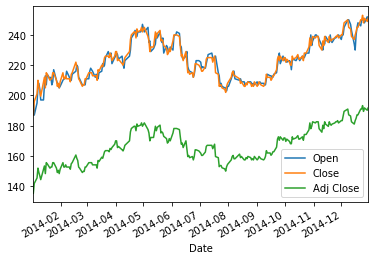

In [2]:
DATA_HOME = os.path.join("..","..","dataset","historical")

symbols = ["ADVANC","BTS"]
data = {}
for s in symbols:
    data[s] = pd.read_csv(os.path.join(DATA_HOME,"%s.csv" % s), index_col=0)

df = data["ADVANC"]
df.index = pd.to_datetime(df.index)

period_start='2014-01-01'
period_end='2014-12-31'

daily = df[period_start:period_end]
daily[['Open','Close','Adj Close']].plot()

# William’s R%

momentum indicator that moves between 0 and -100 and measures overbought and oversold levels.


In [3]:
inputs = {
    'open': daily["Open"],
    'high': daily["High"],
    'low': daily["Low"],
    'close': daily["Close"],
    'volume': daily["Volume"]
}
# Note the use of Close instead of Adj Close.

obv = OBV(inputs)
willr_14 = WILLR(inputs)

slowk, slowd = STOCH(inputs, fastk_period=10, prices=['high', 'low', 'close']) # No need for period.!! Check out the C documentation.

daily.loc[:,("OBV")] = obv.tolist()
daily.loc[:,("WilliamsR-14")] = willr_14.tolist()
daily.loc[:,("Stoch-K")] = slowk.tolist()
daily.loc[:,("Stoch-D")] = slowd.tolist()
daily.tail()



,High,Low,Open,Close,Volume,Adj Close,OBV,WilliamsR-14,Stoch-K,Stoch-D
Date,,,,,,,,,,
2014-12-24,253.0,249.0,250.0,253.0,3076400.0,193.273026,19061100.0,-2.857143,93.217893,88.051948
2014-12-25,252.0,246.0,251.0,248.0,1773800.0,189.453384,17287300.0,-17.142857,89.523810,89.947090
2014-12-26,251.0,246.0,248.0,251.0,2452700.0,191.745163,19740000.0,-8.571429,90.476190,91.072631
2014-12-29,253.0,248.0,252.0,249.0,2282500.0,190.217331,17457500.0,-14.285714,85.255732,88.418577
2014-12-30,252.0,247.0,249.0,251.0,2302600.0,191.745163,19760100.0,-8.571429,83.827160,86.519694


# Plot of OBV on the original time-series

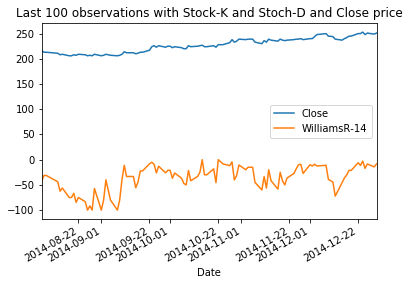

In [4]:
daily[['Close','WilliamsR-14']][-100:].plot(title="Last 100 observations with Stock-K and Stoch-D and Close price")

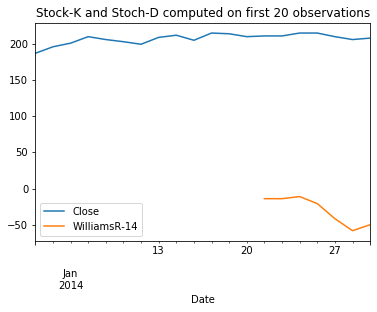

In [5]:
daily[['Close','WilliamsR-14']][:20].plot(title="WilliamsR-14 computed on first 20 observations")

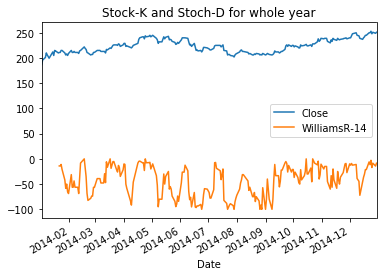

In [6]:
daily[['Close','WilliamsR-14']].plot(title="WilliamsR-14 for whole year")